In [29]:
# Importar biblioteca 

import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt

dir_path = 'c:\\Users\\FIC\\CURSO PYTHON - FELIPE MUNHOS\\Desafio 01 - Super Atacadista-20230929T224916Z-001\\Desafio 01 - Super Atacadista\\arquivos\\vendas\\'


res = []


for path in os.listdir (dir_path):
    if os.path.isfile(dir_path + path):
        res.append(dir_path + path)


file_combined = pd.DataFrame()

# Estrutura para combinar os arquivos

for file in res:
    df1 = pd.read_excel (file)
    file_combined = pd.concat ([file_combined,df1])

dirFinal = 'c:\\Users\\FIC\\CURSO PYTHON - FELIPE MUNHOS\\Desafio 01 - Super Atacadista-20230929T224916Z-001\\Desafio\\'
fileName = 'vendas.csv'

file_combined.to_csv(dirFinal + fileName)

In [30]:
# Verificar o tamanho de linha e conta

file_combined.shape

(302840, 9)

In [31]:
file_combined.head()

,DataEmissao,DataVencimento,NFe,cdCliente,cdVendedor,cdProduto,QtdItens,ValorUnitario,Peso Líquido
0,2017-01-12,2017-02-22,1492762,3140218,265,1073,6,8.83,0.60
1,2017-01-12,2017-02-22,1492762,3140218,265,1420,6,4.44,5.40
2,2017-01-12,2017-02-22,1492762,3140218,265,264,10,0.96,1.92
3,2017-01-13,2017-01-29,1492719,2983332,265,1154,6,2.92,1.26
4,2017-01-13,2017-01-29,1492719,2983332,265,1527,6,2.81,1.40


In [32]:
# Carregar a tabela Clientes

path = 'c:\\Users\\FIC\\CURSO PYTHON - FELIPE MUNHOS\\Desafio 01 - Super Atacadista-20230929T224916Z-001\\Desafio 01 - Super Atacadista\\arquivos\\'
file = "Dimensões.xlsx"

dfClientes = pd.read_excel (path + file, sheet_name = "Cliente")

dfClientes.head()

,cdCliente,Razão Social,Status,Categoria,Cidade,UF
0,1339104,Vinicius e Filipe Cantina ME,A,Cantinas,Curitiba,PR
1,1339740,Sandra e Cláudio Cantina Ltda,A,Cantinas,Curitiba,PR
2,1339884,Vera e Analu Cantina ME,A,Cantinas,Curitiba,PR
3,1340322,Emilly e Vitor Cantina Ltda,A,Cantinas,Curitiba,PR
4,4837795,Kaique e Rafaela Cantina ME,A,Cantinas,Curitiba,PR


In [33]:
# Carregar a tabela Clientes

path = 'c:\\Users\\FIC\\CURSO PYTHON - FELIPE MUNHOS\\Desafio 01 - Super Atacadista-20230929T224916Z-001\\Desafio 01 - Super Atacadista\\arquivos\\'
file = "Dimensões.xlsx"

dfData = pd.read_excel (path + file, sheet_name = "Data")

dfData.head()

,Data,Ano,Mes,MesNum,Dia
0,2017-01-01,2017,Janeiro,1,1
1,2017-01-02,2017,Janeiro,1,2
2,2017-01-03,2017,Janeiro,1,3
3,2017-01-04,2017,Janeiro,1,4
4,2017-01-05,2017,Janeiro,1,5


In [34]:
# Carregar a tabela Grupo de produto

path = 'c:\\Users\\FIC\\CURSO PYTHON - FELIPE MUNHOS\\Desafio 01 - Super Atacadista-20230929T224916Z-001\\Desafio 01 - Super Atacadista\\arquivos\\'
file = "Dimensões.xlsx"

dfGrupoProdutos = pd.read_excel (path + file, sheet_name = "GrupoProduto")

dfGrupoProdutos.head()

,cdGrupo,Grupo,Linha
0,102,Leite em Pó,Alimentos
1,103,Açúcares,Alimentos
2,104,Doces Enlatados,Alimentos
3,105,Farinhas,Alimentos
4,106,Óleos,Alimentos


In [35]:
# Carregar a tabela Vendedor


path = 'c:\\Users\\FIC\\CURSO PYTHON - FELIPE MUNHOS\\Desafio 01 - Super Atacadista-20230929T224916Z-001\\Desafio 01 - Super Atacadista\\arquivos\\'
file = "Dimensões.xlsx"

dfVendedores = pd.read_excel (path + file, sheet_name = "Vendedor")

dfVendedores.head()

,cdVendedor,Vendedor,cdSupervisor,Supervisor,cdGerente,Gerente,Equipe
0,669,Kaua Araujo,15,Fernando Silva,1,Victor Castro,Varejo
1,660,Julieta Gomes,25,Emily Rocha,1,Victor Castro,Varejo
2,183,Isabella Sousa,25,Emily Rocha,1,Victor Castro,Varejo
3,102,Gustavo Barros,25,Emily Rocha,1,Victor Castro,Varejo
4,196,Leonardo Cardoso,30,Diego Araujo,1,Victor Castro,Varejo


# META

# 1. Valor total de Faturamento e Valor total da meta por ano?

In [36]:
dfData.head()

,Data,Ano,Mes,MesNum,Dia
0,2017-01-01,2017,Janeiro,1,1
1,2017-01-02,2017,Janeiro,1,2
2,2017-01-03,2017,Janeiro,1,3
3,2017-01-04,2017,Janeiro,1,4
4,2017-01-05,2017,Janeiro,1,5


# 2 ) Qual a cobertura de clientes por ano?
### (Cobertura de clientes = total de clientes que efetuaram uma compra)

In [37]:
# Bloco utilizado para combinar as colinas, ANO. Mês, Dia e MesNum do dataframe
#dfData, para que seja possivel agregar os dados de modo a visualizar as informações por ano.


df_merge =  file_combined.merge(dfData, # Tabela da direita ( Forncedora das colunas faltantes)
                                left_on= 'DataEmissao',# Coluna que será utilizada como valor procurado na tabela esq.
                                  right_on= 'Data', # Coluna da Tabela da direita que será utilizada para busca
                                  how='left' # é a forma que os dados serão inseridos, Esqueda <----- Direta
                                  )

df_merge

,DataEmissao,DataVencimento,NFe,cdCliente,cdVendedor,cdProduto,QtdItens,ValorUnitario,Peso Líquido,Data,Ano,Mes,MesNum,Dia
0,2017-01-12,2017-02-22,1492762,3140218,265,1073,6,8.83,0.60,2017-01-12,2017,Janeiro,1,12
1,2017-01-12,2017-02-22,1492762,3140218,265,1420,6,4.44,5.40,2017-01-12,2017,Janeiro,1,12
2,2017-01-12,2017-02-22,1492762,3140218,265,264,10,0.96,1.92,2017-01-12,2017,Janeiro,1,12
3,2017-01-13,2017-01-29,1492719,2983332,265,1154,6,2.92,1.26,2017-01-13,2017,Janeiro,1,13
4,2017-01-13,2017-01-29,1492719,2983332,265,1527,6,2.81,1.40,2017-01-13,2017,Janeiro,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302835,2022-03-12,2022-04-14,2173547,673190,265,202,24,1.62,1.50,2022-03-12,2022,Março,3,12
302836,2022-03-12,2022-04-14,2173547,673190,265,1154,12,3.25,1.75,2022-03-12,2022,Março,3,12
302837,2022-03-12,2022-04-14,2173547,673190,265,668,12,3.26,1.00,2022-03-12,2022,Março,3,12
302838,2022-03-12,2022-04-14,2173547,673190,265,1527,12,3.14,1.00,2022-03-12,2022,Março,3,12


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Ano', ylabel='cdCliente'>

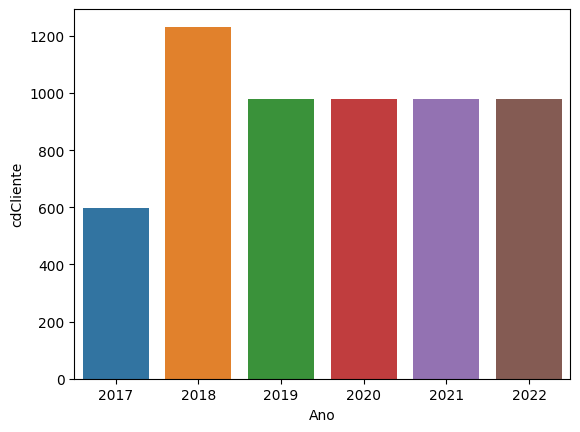

In [38]:
# Cria um novo dataframe, considerando apenas as colunas ANO e cdCliente do df_merge
df_contagem_cliente = df_merge.loc[:,['Ano',"cdCliente"]]

# Remover a duplicada para calcular a cobertura de clientes
# Sendo que para este cálculo ´necessário eliminar os registros
#Duplicados, considera todas as colunas
df_contagem_cliente = df_contagem_cliente.drop_duplicates()

#Agrupa os dados, pro meio de contagem, separando os dados
#Através da coluna ANO
df_contagem_cliente = df_contagem_cliente.groupby(['Ano']).count()

#df_merge.groupby(["Ano","cdCliente"]).count()

sns.barplot(x = df_contagem_cliente.index, y= 'cdCliente', data = df_contagem_cliente)

### 3) Peso líquido total vendidos por ano?


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0, 0, '414.819'),
 Text(0, 0, '658.505'),
 Text(0, 0, '61.4656'),
 Text(0, 0, '61.4656'),
 Text(0, 0, '61.4656'),
 Text(0, 0, '61.4656')]

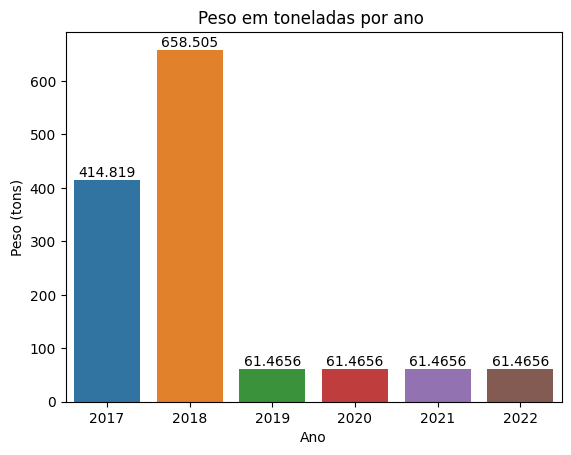

In [48]:
# Criando um dataframe com as colunas Ano é Peso Liquido 
df_peso_ano = df_merge.loc[:,['Ano','Peso Líquido']]

df_peso_ano = df_peso_ano.groupby('Ano').sum()

df_peso_ano ['Peso_tons'] =  df_peso_ano ['Peso Líquido']/1000

df_peso_ano


# GERAR O GRÁFICO  DE BARRAS

graficos = sns.barplot (
    x = df_peso_ano.index,
    y = df_peso_ano ['Peso_tons']

)

# Titulo do gráfico

plt.title ('Peso em toneladas por ano ')

# Titulo do eixo y

plt.ylabel ( "Peso (tons)")

# Titulo do eixo x

plt.xlabel ( "Ano")

# Rotulo nas colunas  do gráfico

graficos.bar_label(graficos.containers [0])

### 4. Qual é Total de Faturamento da Super Atacadista em todo o período?

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Ano', ylabel='subtotal'>

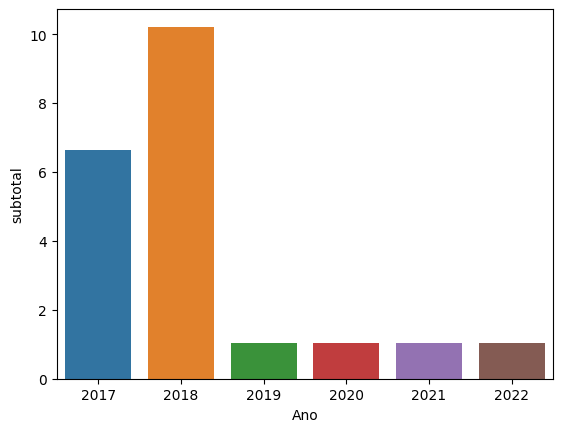

In [88]:
df_fat = df_merge.loc[:,['Ano','QtdItens','ValorUnitario']]

# Adicionando a coluna Subtotal
df_fat['subtotal'] = df_fat['QtdItens'] * df_fat['ValorUnitario']

# Calcular o total vendido no período
df_fat = df_fat.loc[:,['Ano','subtotal']]

df_fat = df_fat.groupby('Ano').sum() / (10 ** 6)

df_fat



# Criando o gráfico de colunas
sns.barplot(x = df_fat.index, y = df_fat['subtotal'])


### 5. Qual foi a quantidade total de produtos vendidos em todo o período?


In [112]:
# Seleciona a coluna Peso Líquido e realiza soma deste valor
# e converte o total em toneladas

peso_vendido = file_combined['Peso Líquido'].sum() / 1000

# Trata a quantidade de casas decimais, ajustando para 2 casas
# após a virgula

peso_vendido = (peso_vendido,2)

print(f'o peso total vendio foi de {peso_vendido}toneladas.') 



o peso total vendio foi de (1319.1868900000002, 2)toneladas.


### 6 )Qual foi o total de peso em toneladas dos produtos vendidos em todo o período?

In [113]:
# Seleciona a coluna Peso Líquido e realiza soma deste valor
# e converte o total em toneladas

peso_vendido = file_combined['Peso Líquido'].sum() / 1000

# Trata a quantidade de casas decimais, ajustando para 2 casas
# após a virgula

peso_vendido = (peso_vendido,2)

print(f'o peso total vendio foi de {peso_vendido}toneladas.') 

o peso total vendio foi de (1319.1868900000002, 2)toneladas.


### 7) Quantos clientes ativos e inativos temos em nossa empresa?


([<matplotlib.patches.Wedge at 0x1f745cc53d0>,
 [Text(-1.0939826195114473, 0.11490007922918268, 'Ativo'),
  Text(1.093982623545592, -0.11490004081941627, 'Inativo')],
 [Text(-0.5967177924607893, 0.06267277048864509, '97%'),
  Text(0.596717794661232, -0.0626727495378634, '3%')])

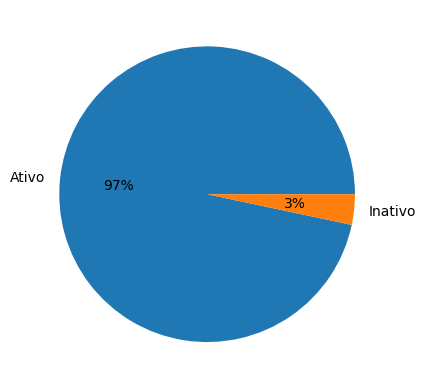

In [106]:
# Selecionando as colunas cdCliente e Status do
# daframe dfClientes.

dfClientes_resumo = dfClientes.loc[:,['cdCliente','Status']]

# Substituir os valores na coluna status
# A Ativo / I - Inativo

dfClientes_resumo ['Status'] = dfClientes_resumo ['Status'].replace('A','Ativo')
dfClientes_resumo ['Status'] = dfClientes_resumo ['Status'].replace('I','Inativo')


#dfClientes[dfClientes_resumo['Status']== 'Inativo']

dfClientes_resumo = dfClientes_resumo.groupby('Status').count()



plt.pie(
        dfClientes_resumo['cdCliente'],#
        labels=dfClientes_resumo.index,
        autopct='%.0f%%'
)


### 8)Qual foi o ano com maior ticket médio dos produtos?

In [124]:
df_ticket = df_merge.loc[:,['Ano','QtdItens','ValorUnitario']]

#df_ticket [ 'ValorTotal'] = df_ticket['QtdItens'] * df_ticket['ValorUnitario']

df_ticket ['valortotal'] = df_ticket ['QtdItens'] * df_ticket['ValorUnitario']
df_ticket = df_ticket.loc [:,['Ano','QtdItens','valortotal']]

df_ticket = df_ticket.groupby('Ano').sum ()

df_ticket['Ticket Medio'] = df_ticket ['valortotal'] / df_ticket['QtdItens']

df_ticket

,QtdItens,valortotal,Ticket Medio
Ano,,,
2017,2167345,6648222.05,3.067450
2018,3864838,10214809.43,2.643011
2019,348989,1046201.01,2.997805
2020,348989,1046201.01,2.997805
2021,348989,1046201.01,2.997805
2022,348989,1046201.01,2.997805
